In [106]:
import numpy as np
from scipy import linalg
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from tabulate import tabulate
import sympy as sy
from mpl_toolkits.mplot3d import Axes3D

In [76]:
def char_pol(b, sig, r, lam):
    return lam**3+(1+b+sig)*lam**2+b*(sig+r)*lam+2*sig*b*(r-1)

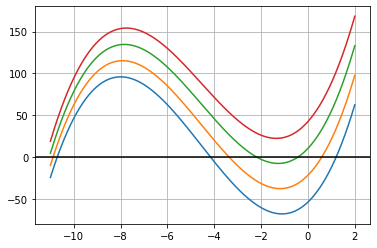

In [77]:
sig = 10
b = 8/3
r = np.linspace(0, 1.8, 4)
fig, ax = plt.subplots()
lam = np.linspace(-11, 2, 1000)
for i in r:
    ax.plot(lam, char_pol(b, sig, i, lam))
ax.grid(True, which='both')

ax.axhline(y=0, color='k')

In [88]:
def zero_solver(sig, b, r1, f):
    x = sy.symbols("x")
    eq = sy.Eq(f(b, sig, r1, x), 0)
    sol = sy.solve(eq)
    return [sy.re(x) for x in sol], [sy.im(x)  for x in sol]

Text(0.5, 1.0, 'Zero-points')

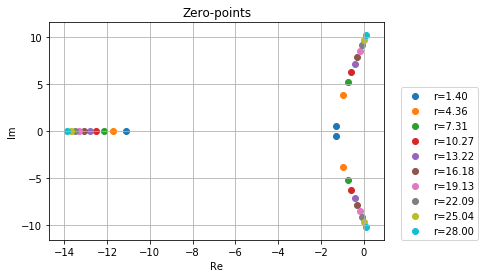

In [91]:

r = np.linspace(1.4 ,28, 10)


for i in r:
    X, Y = zero_solver(sig, b, i, char_pol)
    plt.scatter(X, Y, label='r={:.2f}'.format(i))
plt.grid()
plt.legend(loc=(1.05,0))
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Zero-points')

In [94]:
import numpy as np

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

In [151]:
def func(vector, x0, r):
    dx =  -sig*(vector[0]-vector[1])
    dz = r*vector[0] - vector[1] - vector[0]*vector[2]
    dy = vector[0]*vector[1] - b*vector[2]
    return np.array([dx, dy, dz])

def start(r):
    if r<1:
        return np.array([0.1, 0.1, 0.1])
    else:
        a0 = np.sqrt(b*(r-1))
        return np.array([a0+0.1, a0+0.1, r-1+0.1])
    

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in d

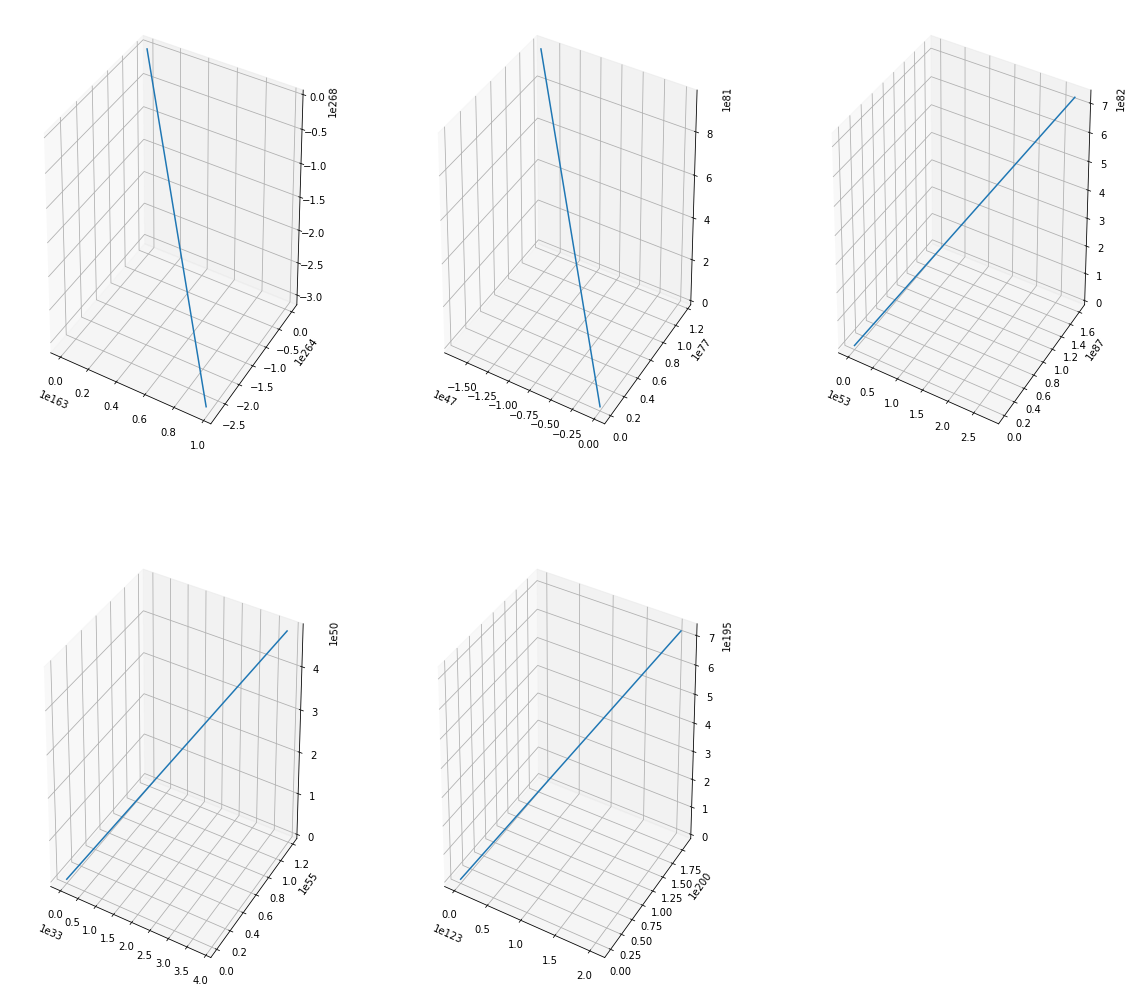

In [148]:
h = 0.001
fig = plt.figure(figsize=(20,18))

r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
for n, r in enumerate(r_s):
    y, x = rk4(start(r), np.array([0]), func, h, 10000, f_args={"r":r})
    ax = plt.subplot(2,3,n+1, projection="3d")
    ax.plot(y[:,0], y[:,1], y[:,2])


/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


array([0.1, 0.1, 0.1])

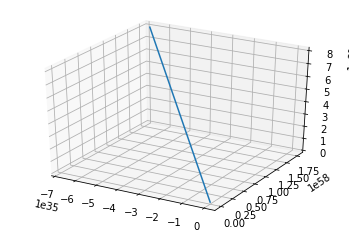

In [145]:
r=0.5
h = 0.01
y, x = rk4(start(r), np.array([0]), f, h, 10000, f_args={"r":r})
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(y[:,0], y[:,1], y[:,2])
y[0]

In [156]:
r = 0.5
sig = 10.0
b = 8.0/3.0
def func1(vector, x):
    dx =  -sig*(vector[0]-vector[1])
    dz = r*vector[0] - vector[1] - vector[0]*vector[2]
    dy = vector[0]*vector[1] - b*vector[2]
    return np.array([dx, dy, dz])

def start(r):
    if r<1:
        return np.array([0.1, 0.1, 0.1])
    else:
        a0 = np.sqrt(b*(r-1))
        return np.array([a0+0.1, a0+0.1, r-1+0.1])
    

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


[0.1 0.1 0.1]


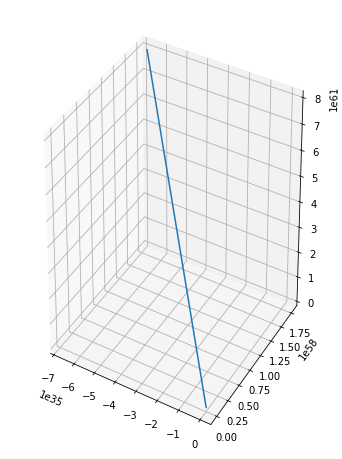

In [158]:
h = 0.01
fig = plt.figure(figsize=(20,18))
y, x = rk4(start(r), np.array([0]), func1, h, 10000)
ax = plt.subplot(2,3,n+1, projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2])
print(y[0])
